In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = 'HMEQ.csv'

In [3]:
#print(open(file).read())

In [4]:
data = pd.read_csv('HMEQ.csv', error_bad_lines=False)

b'Skipping line 20: expected 13 fields, saw 14\nSkipping line 3740: expected 13 fields, saw 14\nSkipping line 5467: expected 13 fields, saw 17\nSkipping line 5624: expected 13 fields, saw 15\n'


In [5]:
df = pd.DataFrame(data)

In [6]:
df.shape

(5958, 13)

In [7]:
# mengecek row yang tidak unique
duplicated = df[df.duplicated(keep='first')]

In [8]:
duplicated

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5956,0,86000,47355.0,85000.0,DebtCon,Other,15.0,0.0,0.0,210.966667,0.0,16.0,NaN
5957,0,23800,76390.0,110315.0,DebtCon,Mgr,7.0,0.0,0.0,275.955356,2.0,29.0,29.713601


In [9]:
duplicated.index

Int64Index([5956, 5957], dtype='int64')

In [10]:
# membuang data yang duplikat
df.drop(duplicated.index, inplace=True)

In [148]:
columns = df.columns

In [13]:
df.shape

(5956, 13)

In [14]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         514
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1266
dtype: int64

In [15]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5956.000000,5.956000e+03,5438.000000,5.844000e+03,5442.000000,5248.000000,5376.000000,5648.000000,5446.000000,5734.000000,4690.000000
mean,0.201310,1.971185e+04,73748.933468,2.581995e+05,8.917723,0.254764,0.449777,179.780713,1.186192,21.292989,35.190007
std,0.420633,8.601150e+04,44428.383479,1.177511e+07,7.570377,0.846340,1.127619,85.820818,1.728984,10.139131,73.635359
min,0.000000,1.100000e+03,2063.000000,-2.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-21.719596
25%,0.000000,1.110000e+04,46303.000000,6.608425e+04,3.000000,0.000000,0.000000,115.116702,0.000000,14.250000,29.135281
50%,0.000000,1.630000e+04,65019.000000,8.924500e+04,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.817611
75%,0.000000,2.330000e+04,91459.750000,1.198242e+05,13.000000,0.000000,0.000000,231.601311,2.000000,26.000000,39.008632
max,10.000000,6.600000e+06,399550.000000,9.001400e+08,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,4537.512708


In [16]:
def detect_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)

    iqr = q3 - q1
    rub = q3 + 1.5*iqr
    rlb = q1 - 1.5*iqr

    outlier = (data[column] < rlb) | (data[column] > rub)
    
    return data[outlier]

In [17]:
def decide_to_drop(df, column):
    res = (len(detect_outlier(df,column))/len(df.index))*100.0
    if res < 3.0 :
        print('Tidak terdapat banyak data yang outlier')
        df.drop(detect_outlier(df,column).index, inplace=True)
    else :
        print('Tidak disarankan karena dapat memengaruhi kualitas dataset-nya')

In [18]:
def outlier_count(df, column):
    res = (len(detect_outlier(df,column))/len(df.index))*100.0
    return column + " : " + str(res)

In [159]:
for i in range(df.columns.size):
    if (i<4 or i>6):
        print(outlier_count(df, df.columns[i]))

BAD : 19.919314170448814
LOAN : 4.303244242729871
MORTDUE : 5.160531181711212
VALUE : 5.832913094637755
DEROG : 24.05446293494705
DELINQ : 9.194822659270466
CLAGE : 1.109430156328795
NINQ : 2.9752899646999493
CLNO : 3.681290973272819
DEBTINC : 4.135148764498235


In [160]:
len(detect_outlier(df,'DEBTINC'))

246

### **Kolom BAD**

In [20]:
# mengecek angka yang tidak sesuai
good = df['BAD'].between(0,1, inclusive=True)
bad = ~good

In [21]:
#df.drop(bad.index, inplace=True)
df[bad]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
469,3,7000,73873.0,111781.0,DebtCon,Office,0.0,0.0,0.0,231.799913,0.0,38.0,19.273579
574,10,7500,63500.0,86125.0,HomeImp,Other,5.0,0.0,0.0,136.100000,0.0,8.0,NaN


In [22]:
df[bad].index

Int64Index([469, 574], dtype='int64')

In [23]:
df.shape

(5956, 13)

In [24]:
#membuang data dengan column bad yang nilai lebih dari 1
df.drop(df[bad].index, inplace=True)

In [25]:
df.shape

(5954, 13)

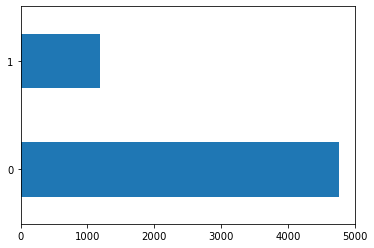

In [26]:
df['BAD'].value_counts().plot.barh()

### **Kolom LOAN**

In [27]:
# df[columns[1]].value_counts()

In [28]:
#df.describe()
# for i in range(0,4):
#     print(df.columns[i])
#     print(" ")
#     print(detect_outlier(df,df.columns[i]))
#     print(" ")

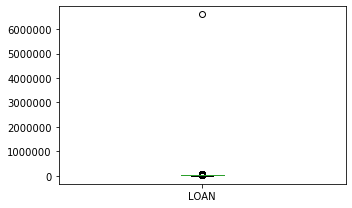

In [29]:
df['LOAN'].plot.box(figsize=(5,3),legend=True);
plt.tight_layout()

In [30]:
#detect_outlier(df,'NINQ')

In [31]:
#df.drop(detect_outlier(df,'LOAN').index, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5954 entries, 0 to 5955
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5954 non-null   int64  
 1   LOAN     5954 non-null   int64  
 2   MORTDUE  5436 non-null   float64
 3   VALUE    5842 non-null   float64
 4   REASON   5702 non-null   object 
 5   JOB      5675 non-null   object 
 6   YOJ      5440 non-null   float64
 7   DEROG    5246 non-null   float64
 8   DELINQ   5374 non-null   float64
 9   CLAGE    5646 non-null   float64
 10  NINQ     5444 non-null   float64
 11  CLNO     5732 non-null   float64
 12  DEBTINC  4689 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 651.2+ KB


In [33]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         514
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1265
dtype: int64

In [34]:
q1 = df['LOAN'].quantile(0.25)
q3 = df['LOAN'].quantile(0.75)

iqr = q3 - q1
rub = q3 + 1.5*iqr
rlb = q1 - 1.5*iqr

outlier = (df['LOAN'] < rlb) | (df['LOAN'] > rub)

In [35]:
df[outlier]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
419,0,6600000,40926.0,50486.0,HomeImp,Office,10.0,NaN,NaN,179.800868,NaN,19.0,27.532376
5700,0,41700,59889.0,109250.0,DebtCon,Mgr,16.0,0.0,0.0,187.132811,0.0,22.0,36.968814
5701,0,41700,12375.0,71029.0,HomeImp,Office,NaN,0.0,0.0,325.284193,0.0,19.0,16.101434
5702,1,41700,NaN,854112.0,HomeImp,Other,16.0,0.0,0.0,180.608878,0.0,23.0,42.071645
5703,1,41700,NaN,854114.0,HomeImp,Other,18.0,0.0,0.0,189.099378,1.0,23.0,43.258779
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5951,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5952,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5953,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5954,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


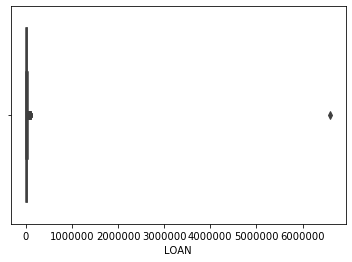

In [36]:
sns.boxplot(x=df['LOAN'])

In [37]:
df['LOAN'].skew()

75.2111392816083

In [38]:
loan_max = df.loc[df['LOAN'] == 6600000]
loan_max

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
419,0,6600000,40926.0,50486.0,HomeImp,Office,10.0,NaN,NaN,179.800868,NaN,19.0,27.532376


In [39]:
#membuang data yang terlalu jauh
df.drop(loan_max.index, inplace=True)

In [40]:
df.shape

(5953, 13)

In [41]:
# df.loc[df['LOAN'] == 6600000]

In [42]:
df['LOAN'].skew()

2.026803155459771

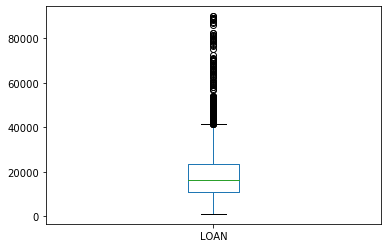

In [43]:
df['LOAN'].plot(kind='box')

### **Kolom JOB dan REASON**

In [44]:
df['REASON'].value_counts()

DebtCon     3923
HomeImp     1777
DebtCons       1
Name: REASON, dtype: int64

In [45]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         514
DEROG       707
DELINQ      579
CLAGE       308
NINQ        509
CLNO        222
DEBTINC    1265
dtype: int64

In [46]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [47]:
print(df['JOB'].value_counts())
print(" ")
print(df['REASON'].value_counts())

Other      2383
ProfExe    1276
Office      946
Mgr         766
Self        193
Sales       109
Othe          1
Name: JOB, dtype: int64
 
DebtCon     3923
HomeImp     1777
DebtCons       1
Name: REASON, dtype: int64


In [48]:
#Diganti dengan modus 
values = {'REASON' : 'DebtCon', 'JOB' : 'Other'}

df = df.fillna(value=values)

In [49]:
print(df['JOB'].value_counts())
print(" ")
print(df['REASON'].value_counts())

Other      2662
ProfExe    1276
Office      946
Mgr         766
Self        193
Sales       109
Othe          1
Name: JOB, dtype: int64
 
DebtCon     4175
HomeImp     1777
DebtCons       1
Name: REASON, dtype: int64


In [50]:
df[df.duplicated(keep='first')]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC


In [51]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON        0
JOB           0
YOJ         514
DEROG       707
DELINQ      579
CLAGE       308
NINQ        509
CLNO        222
DEBTINC    1265
dtype: int64

In [52]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5953.000000,5953.000000,5435.000000,5.841000e+03,5439.000000,5246.000000,5374.000000,5645.000000,5444.000000,5731.000000,4688.000000
mean,0.199227,18610.666891,73756.835547,2.582896e+05,8.919884,0.254861,0.449944,179.779232,1.186627,21.292794,35.195035
std,0.399453,11204.663672,44438.196884,1.177813e+07,7.571298,0.846487,1.127795,85.838862,1.729152,10.137817,73.650615
min,0.000000,1100.000000,2063.000000,-2.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-21.719596
25%,0.000000,11100.000000,46306.000000,6.608500e+04,3.000000,0.000000,0.000000,115.076186,0.000000,14.500000,29.141405
50%,0.000000,16300.000000,65021.000000,8.925000e+04,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818353
75%,0.000000,23300.000000,91485.000000,1.198460e+05,13.000000,0.000000,0.000000,231.599945,2.000000,26.000000,39.010135
max,1.000000,89900.000000,399550.000000,9.001400e+08,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,4537.512708


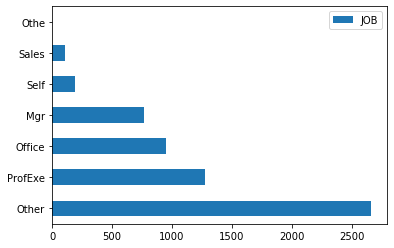

In [53]:
df['JOB'].value_counts().plot.barh(legend=True)

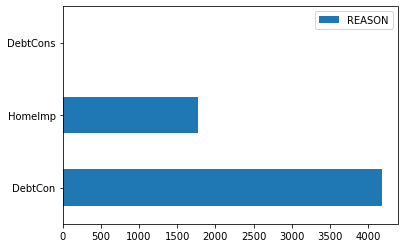

In [54]:
df['REASON'].value_counts().plot.barh(legend=True)

In [55]:
#Kesalahan penulisan
othe = df[df['JOB'] == 'Othe']
othe

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
2514,0,14900,45797.0,71942.0,DebtCon,Othe,11.0,0.0,0.0,233.678731,0.0,17.0,33.550265


In [56]:
df['JOB'] = df['JOB'].replace('Othe', 'Other')

In [57]:
#Kesalahan penulisan
debtcons = df[df['REASON'] == 'DebtCons']
debtcons

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
2297,0,13900,47741.0,69111.0,DebtCons,Other,2.0,0.0,0.0,254.259613,0.0,21.0,28.885618


In [58]:
df['REASON'] = df['REASON'].replace('DebtCons', 'DebtCon')

In [59]:
print(df['JOB'].value_counts())
print(" ")
print(df['REASON'].value_counts())

Other      2663
ProfExe    1276
Office      946
Mgr         766
Self        193
Sales       109
Name: JOB, dtype: int64
 
DebtCon    4176
HomeImp    1777
Name: REASON, dtype: int64


In [60]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON        0
JOB           0
YOJ         514
DEROG       707
DELINQ      579
CLAGE       308
NINQ        509
CLNO        222
DEBTINC    1265
dtype: int64

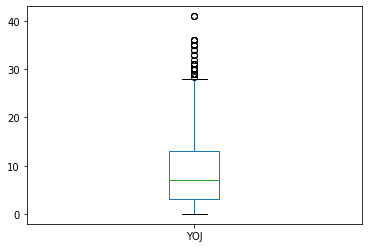

In [61]:
df['YOJ'].plot(kind='box')

### **Kolom LAINNYA**

In [62]:
detect_outlier(df,'MORTDUE')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
139,0,4900,170986.0,245300.0,DebtCon,Sales,NaN,0.0,0.0,131.933333,0.0,22.0,NaN
193,0,5100,179725.0,251962.0,DebtCon,Sales,NaN,0.0,0.0,127.498813,0.0,22.0,40.308259
290,0,5800,172595.0,250155.0,DebtCon,Sales,NaN,0.0,0.0,126.400984,0.0,21.0,43.207760
325,1,6000,179397.0,200000.0,DebtCon,ProfExe,5.0,6.0,0.0,90.300000,6.0,29.0,NaN
344,0,6200,171582.0,245730.0,DebtCon,Sales,NaN,0.0,0.0,135.108930,0.0,22.0,39.783818
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5921,0,69700,191972.0,294367.0,DebtCon,Self,10.0,0.0,0.0,230.705613,2.0,25.0,28.201871
5922,0,70300,197761.0,294169.0,DebtCon,Self,9.0,0.0,0.0,212.239725,2.0,24.0,28.907073
5923,0,70500,196690.0,288512.0,DebtCon,Self,9.0,0.0,0.0,227.027136,2.0,24.0,29.582301
5924,0,70800,192044.0,292380.0,DebtCon,Self,10.0,0.0,0.0,221.608486,2.0,25.0,30.378548


In [63]:
df.shape

(5953, 13)

In [64]:
decide_to_drop(df, 'BAD')

Tidak disarankan karena dapat memengaruhi kualitas dataset-nya


In [65]:
# tidak boleh negatif
df[df['VALUE'] < 0]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
497,1,7000,18000.0,-25000.0,DebtCon,Other,6.5,1.0,0.0,205.966667,1.0,19.0,NaN


In [66]:
df['VALUE'] = df['VALUE'].replace(-25000.0, np.nan)

In [67]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       113
REASON        0
JOB           0
YOJ         514
DEROG       707
DELINQ      579
CLAGE       308
NINQ        509
CLNO        222
DEBTINC    1265
dtype: int64

In [68]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5953.000000,5953.000000,5435.000000,5.840000e+03,5439.000000,5246.000000,5374.000000,5645.000000,5444.000000,5731.000000,4688.000000
mean,0.199227,18610.666891,73756.835547,2.583381e+05,8.919884,0.254861,0.449944,179.779232,1.186627,21.292794,35.195035
std,0.399453,11204.663672,44438.196884,1.177914e+07,7.571298,0.846487,1.127795,85.838862,1.729152,10.137817,73.650615
min,0.000000,1100.000000,2063.000000,8.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-21.719596
25%,0.000000,11100.000000,46306.000000,6.608725e+04,3.000000,0.000000,0.000000,115.076186,0.000000,14.500000,29.141405
50%,0.000000,16300.000000,65021.000000,8.926300e+04,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818353
75%,0.000000,23300.000000,91485.000000,1.198845e+05,13.000000,0.000000,0.000000,231.599945,2.000000,26.000000,39.010135
max,1.000000,89900.000000,399550.000000,9.001400e+08,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,4537.512708


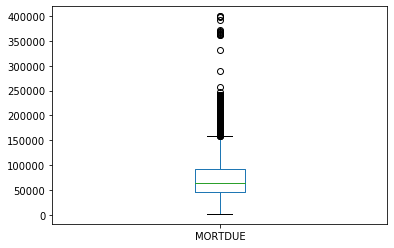

In [69]:
df['MORTDUE'].plot(kind='box')

In [70]:
df['MORTDUE'].skew()

1.8166023883543136

In [71]:
df['MORTDUE'].isnull().sum()

518

In [72]:
mortdue_mean = df['MORTDUE'].mean()

In [73]:
df['MORTDUE'] = df['MORTDUE'].fillna(value=mortdue_mean)

In [74]:
df['MORTDUE'].isnull().sum()

0

In [75]:
df['MORTDUE'].skew()

1.9011553847478015

In [76]:
detect_outlier(df, 'VALUE')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
139,0,4900,170986.0,245300.0,DebtCon,Sales,NaN,0.0,0.0,131.933333,0.0,22.0,NaN
193,0,5100,179725.0,251962.0,DebtCon,Sales,NaN,0.0,0.0,127.498813,0.0,22.0,40.308259
290,0,5800,172595.0,250155.0,DebtCon,Sales,NaN,0.0,0.0,126.400984,0.0,21.0,43.207760
344,0,6200,171582.0,245730.0,DebtCon,Sales,NaN,0.0,0.0,135.108930,0.0,22.0,39.783818
413,1,6500,183860.0,208910.0,DebtCon,ProfExe,4.0,6.0,0.0,86.452227,6.0,29.0,69.800525
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5923,0,70500,196690.0,288512.0,DebtCon,Self,9.0,0.0,0.0,227.027136,2.0,24.0,29.582301
5924,0,70800,192044.0,292380.0,DebtCon,Self,10.0,0.0,0.0,221.608486,2.0,25.0,30.378548
5925,0,71200,196601.0,289430.0,DebtCon,Self,12.0,0.0,0.0,226.914307,2.0,25.0,29.220351
5929,1,77200,83962.0,215000.0,HomeImp,Self,8.0,1.0,2.0,71.533132,3.0,14.0,NaN


In [77]:
df['VALUE'].isnull().sum()

113

In [78]:
value_median = df['VALUE'].median()

In [79]:
df['VALUE'].skew()

76.3883937313375

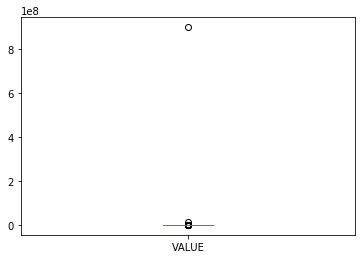

In [80]:
df['VALUE'].plot(kind='box')

In [81]:
df['VALUE'] = df['VALUE'].fillna(value=value_median)

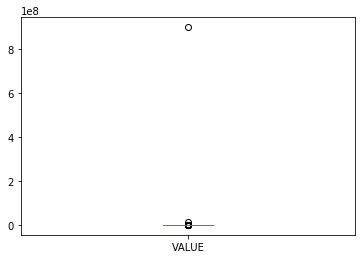

In [82]:
df['VALUE'].plot(kind='box')

In [83]:
df['VALUE'].skew()

77.12388132211075

In [84]:
df['VALUE'].value_counts()

89263.0     113
60000.0      15
80000.0      14
85000.0      12
65000.0      11
           ... 
108483.0      1
65054.0       1
84519.0       1
64850.0       1
71357.0       1
Name: VALUE, Length: 5379, dtype: int64

In [85]:
max_value = df[df['VALUE'] == df['VALUE'].max()]

In [86]:
df.shape

(5953, 13)

In [87]:
df.drop(max_value.index, inplace=True)

In [88]:
df.shape

(5952, 13)

In [89]:
df['VALUE'].skew()

67.54883503111157

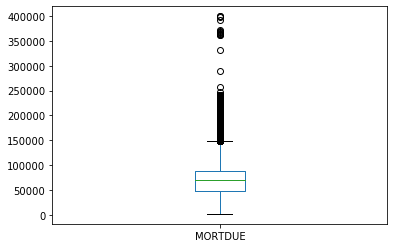

In [90]:
df['MORTDUE'].plot(kind='box')

In [91]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE       0
VALUE         0
REASON        0
JOB           0
YOJ         514
DEROG       707
DELINQ      579
CLAGE       308
NINQ        509
CLNO        222
DEBTINC    1264
dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5952 entries, 0 to 5955
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5952 non-null   int64  
 1   LOAN     5952 non-null   int64  
 2   MORTDUE  5952 non-null   float64
 3   VALUE    5952 non-null   float64
 4   REASON   5952 non-null   object 
 5   JOB      5952 non-null   object 
 6   YOJ      5438 non-null   float64
 7   DEROG    5245 non-null   float64
 8   DELINQ   5373 non-null   float64
 9   CLAGE    5644 non-null   float64
 10  NINQ     5443 non-null   float64
 11  CLNO     5730 non-null   float64
 12  DEBTINC  4688 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 651.0+ KB


In [93]:
for i in range(6, columns.size):
    print("Skewness " + columns[i] + " : " + str(df[columns[i]].skew()))

Skewness YOJ : 0.9895596043574121
Skewness DEROG : 5.318702627618478
Skewness DELINQ : 4.020306876874278
Skewness CLAGE : 1.3435686563807336
Skewness NINQ : 2.6214444553993275
Skewness CLNO : 0.7759146614502507
Skewness DEBTINC : 54.370487873756346


In [94]:
df.skew()

BAD         1.506167
LOAN        2.026762
MORTDUE     1.901195
VALUE      67.548835
YOJ         0.989560
DEROG       5.318703
DELINQ      4.020307
CLAGE       1.343569
NINQ        2.621444
CLNO        0.775915
DEBTINC    54.370488
dtype: float64

In [95]:
df.kurt()

BAD           0.268629
LOAN          6.947769
MORTDUE       7.405610
VALUE      4977.939629
YOJ           0.377324
DEROG        36.835815
DELINQ       23.533518
CLAGE         7.594894
NINQ          9.780139
CLNO          1.161422
DEBTINC    3147.116648
dtype: float64

In [96]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE       0
VALUE         0
REASON        0
JOB           0
YOJ         514
DEROG       707
DELINQ      579
CLAGE       308
NINQ        509
CLNO        222
DEBTINC    1264
dtype: int64

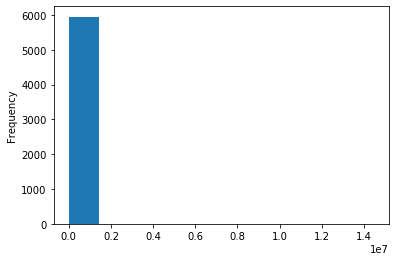

In [97]:
df['VALUE'].plot(kind='hist')

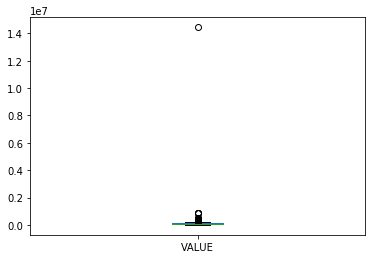

In [98]:
df['VALUE'].plot(kind='box')

In [99]:
max_value_2 = df[df['VALUE'] == df['VALUE'].max()]

In [100]:
df.shape

(5952, 13)

In [101]:
df.drop(max_value_2.index, inplace=True)

In [102]:
df.shape

(5951, 13)

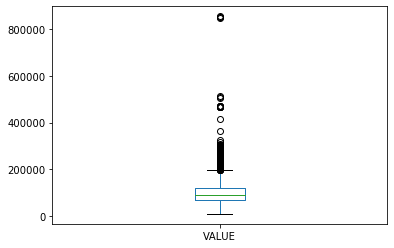

In [103]:
df['VALUE'].plot(kind='box')

In [104]:
df.skew()

BAD         1.505904
LOAN        2.026616
MORTDUE     1.901293
VALUE       3.097787
YOJ         0.989475
DEROG       5.318167
DELINQ      4.019901
CLAGE       1.343591
NINQ        2.621225
CLNO        0.776412
DEBTINC    54.370488
dtype: float64

In [105]:
df.std()

BAD            0.399503
LOAN       11205.867607
MORTDUE    42462.875022
VALUE      56816.326962
YOJ            7.570612
DEROG          0.846578
DELINQ         1.127972
CLAGE         85.843551
NINQ           1.729393
CLNO          10.136894
DEBTINC       73.650615
dtype: float64

In [106]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE       0
VALUE         0
REASON        0
JOB           0
YOJ         514
DEROG       707
DELINQ      579
CLAGE       308
NINQ        509
CLNO        222
DEBTINC    1263
dtype: int64

In [107]:
type(120.0/10)

float

In [108]:
detect_outlier(df, 'YOJ')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
262,1,5600,5000.0,66700.0,HomeImp,Other,31.0,1.0,1.0,204.066667,0.0,11.0,NaN
406,0,6500,75113.0,115900.0,HomeImp,Office,29.0,0.0,0.0,332.733333,2.0,38.0,NaN
407,0,6500,55000.0,88300.0,HomeImp,Office,29.0,0.0,0.0,234.400000,1.0,17.0,NaN
411,0,6500,81145.0,117530.0,HomeImp,Office,29.0,0.0,0.0,327.200639,1.0,38.0,34.345838
415,0,6600,62380.0,89742.0,HomeImp,Office,31.0,0.0,0.0,232.527291,0.0,16.0,26.160495
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683,1,40900,217000.0,290000.0,DebtCon,ProfExe,30.0,1.0,0.0,230.266667,2.0,25.0,NaN
5719,1,42400,220757.0,297444.0,DebtCon,ProfExe,30.0,0.0,0.0,237.589802,1.0,25.0,44.471099
5737,1,43200,217036.0,291222.0,DebtCon,ProfExe,30.0,0.0,0.0,228.146458,1.0,25.0,43.789499
5743,1,43300,217840.0,299171.0,DebtCon,ProfExe,31.0,0.0,0.0,232.270068,1.0,24.0,43.114691


In [109]:
# • DEROG: Jumlah laporan menghina utama
# • DELINQ: Jumlah jalur kredit bermasalah
# • CLAGE: Usia batas kredit tertua dalam beberapa bulan
# • NINQ: Jumlah pertanyaan kredit terbaru

### **Kolom DEBTINC**

In [110]:
debtinc_median = df['DEBTINC'].median()

In [111]:
df['DEBTINC'] = df['DEBTINC'].fillna(value=debtinc_median)

In [112]:
df.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE        0
REASON       0
JOB          0
YOJ        514
DEROG      707
DELINQ     579
CLAGE      308
NINQ       509
CLNO       222
DEBTINC      0
dtype: int64

In [113]:
df['DEBTINC'].skew()

61.25722266298324

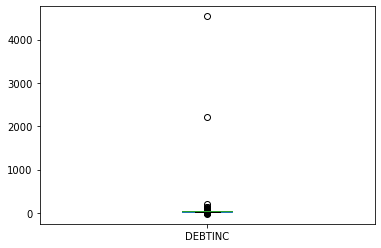

In [114]:
df['DEBTINC'].plot(kind='box')

In [115]:
df[df['DEBTINC'] > 1000].index

Int64Index([74, 187], dtype='int64')

In [116]:
df.drop(df[df['DEBTINC'] > 1000].index, inplace=True)

In [117]:
df.shape

(5949, 13)

In [118]:
df.skew()

BAD        1.506698
LOAN       2.027318
MORTDUE    1.901236
VALUE      3.097645
YOJ        0.989393
DEROG      5.317095
DELINQ     4.019088
CLAGE      1.343071
NINQ       2.621165
CLNO       0.775980
DEBTINC    2.989149
dtype: float64

In [119]:
df.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE        0
REASON       0
JOB          0
YOJ        514
DEROG      707
DELINQ     579
CLAGE      308
NINQ       509
CLNO       222
DEBTINC      0
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001361F7EE860>,
      dtype=object)

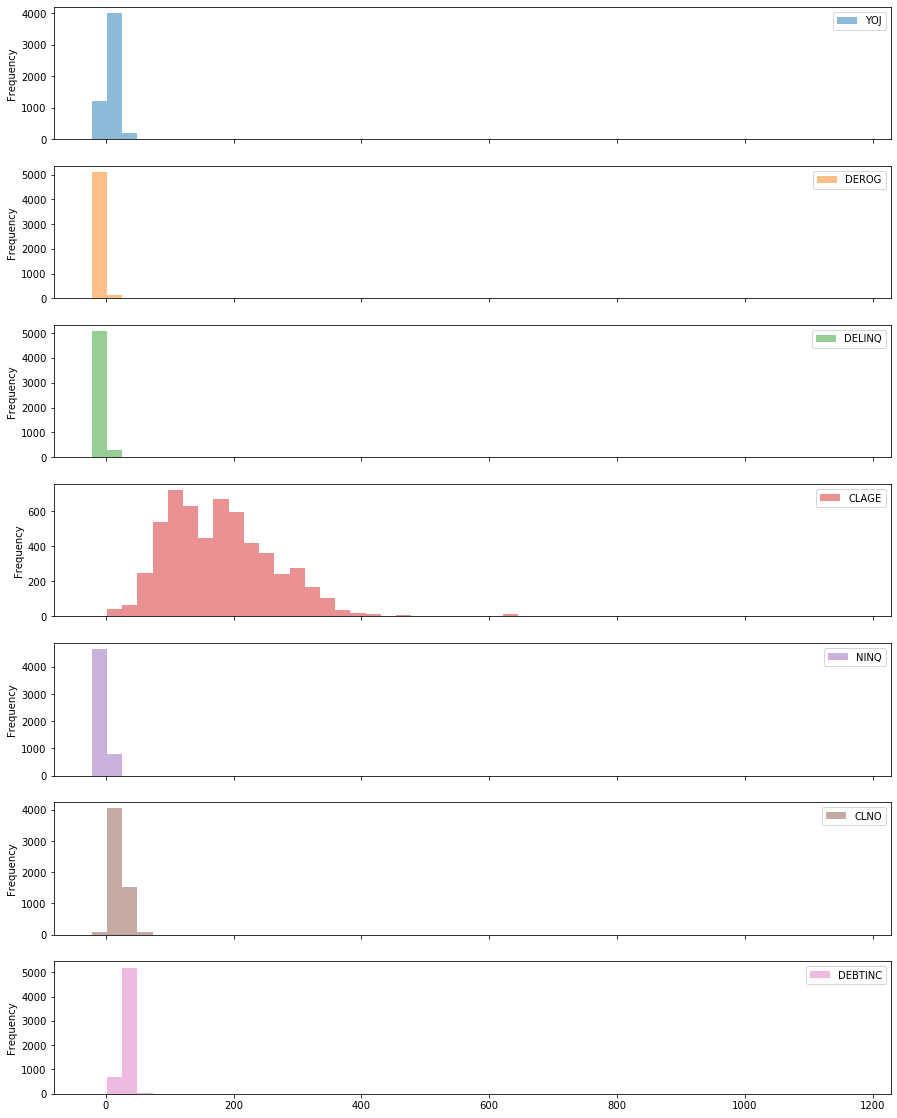

In [120]:
df[columns[6:13]].plot.hist(bins=50, alpha=0.5, subplots=True, figsize=(15,20))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001361F7DE710>,
      dtype=object)

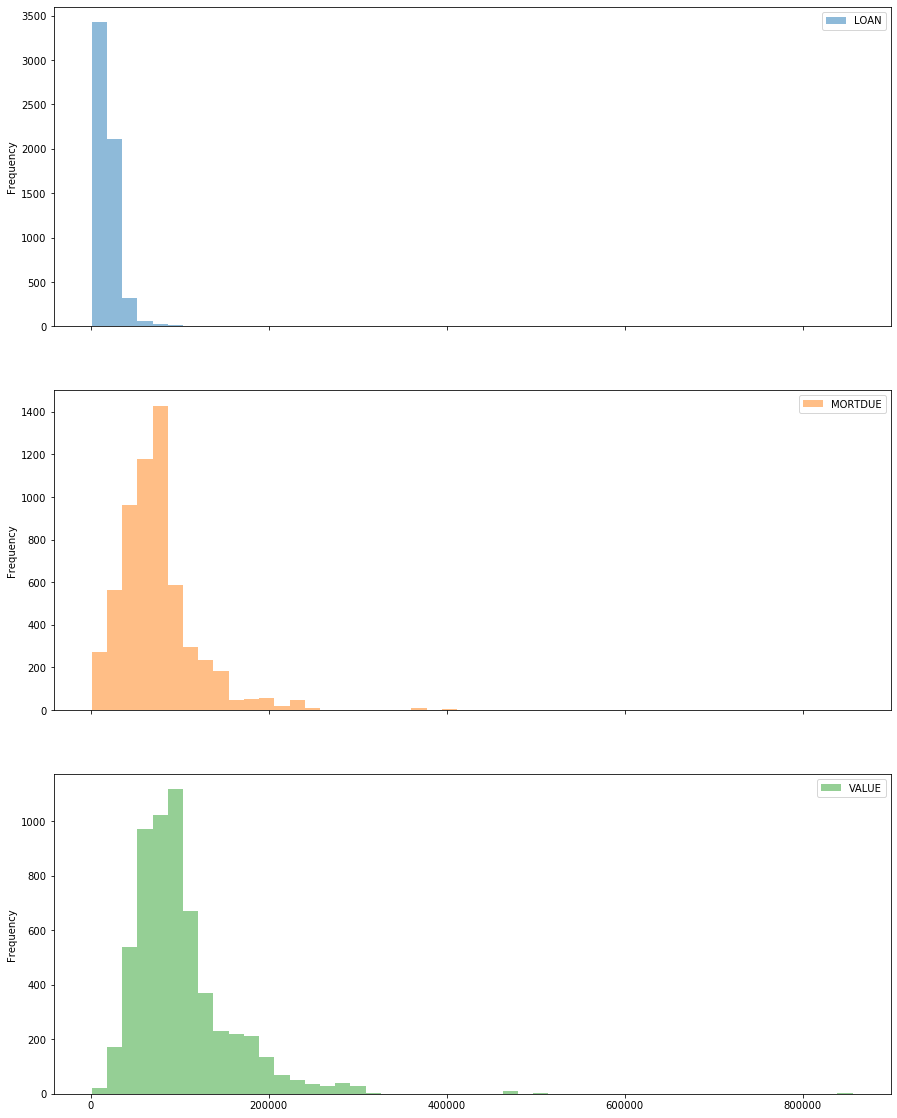

In [121]:
df[columns[1:4]].plot.hist(bins=50, alpha=0.5, subplots=True, figsize=(15,20))

In [122]:
df.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE        0
REASON       0
JOB          0
YOJ        514
DEROG      707
DELINQ     579
CLAGE      308
NINQ       509
CLNO       222
DEBTINC      0
dtype: int64

In [123]:
# def replace_with_mean(df, column):
#     mean = df[column].mean()
#     return df[column].fillna(value=mean)

In [124]:
# df['CLNO'] = replace_with_mean(df, 'CLNO')

In [125]:
df.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE        0
REASON       0
JOB          0
YOJ        514
DEROG      707
DELINQ     579
CLAGE      308
NINQ       509
CLNO       222
DEBTINC      0
dtype: int64

In [126]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5949.000000,5949.000000,5949.000000,5949.000000,5435.000000,5242.000000,5370.000000,5641.000000,5440.000000,5727.000000,5949.000000
mean,0.199193,18616.574214,73768.817114,101539.380239,8.918537,0.254865,0.450279,179.816244,1.186949,21.298411,33.990236
std,0.399427,11204.736979,42466.123207,56821.282514,7.571190,0.846725,1.128148,85.853988,1.729601,10.137106,7.692172
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-21.719596
25%,0.000000,11100.000000,48152.000000,66536.000000,3.000000,0.000000,0.000000,115.076186,0.000000,15.000000,30.746724
50%,0.000000,16400.000000,69548.000000,89263.000000,7.000000,0.000000,0.000000,173.494132,1.000000,20.000000,34.818353
75%,0.000000,23300.000000,88210.000000,119000.000000,13.000000,0.000000,0.000000,231.605411,2.000000,26.000000,37.950788
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [127]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.000000,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818353
1,1,1300,70053.000000,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818353
2,1,1500,13500.000000,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818353
3,1,1500,73756.835547,89263.0,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,34.818353
4,0,1700,97800.000000,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818353


In [128]:
#df[columns[6:13]].plot.box(subplots=True, figsize=(15,20))

In [129]:
detect_outlier(df, 'DEROG')

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,34.818353
16,1,2200,90957.0,102600.0,HomeImp,Mgr,7.0,2.0,6.0,122.900000,1.0,22.0,34.818353
20,1,2400,50000.0,73395.0,HomeImp,ProfExe,5.0,1.0,0.0,NaN,1.0,0.0,34.818353
27,1,2500,25116.0,36350.0,HomeImp,Other,10.0,1.0,2.0,276.966667,0.0,9.0,34.818353
30,1,2800,50795.0,63100.0,HomeImp,Self,26.0,2.0,15.0,145.633333,3.0,45.0,34.818353
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5863,0,52700,23905.0,82670.0,HomeImp,Other,4.0,2.0,0.0,253.351302,7.0,14.0,42.836955
5873,1,53600,208197.0,297280.0,DebtCon,ProfExe,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
5875,0,53700,25813.0,78955.0,HomeImp,Other,3.0,2.0,0.0,243.514855,7.0,14.0,42.998456
5877,0,53700,24158.0,82627.0,HomeImp,Other,2.0,2.0,0.0,250.666543,6.0,14.0,43.268375


In [130]:
df.skew()

BAD        1.506698
LOAN       2.027318
MORTDUE    1.901236
VALUE      3.097645
YOJ        0.989393
DEROG      5.317095
DELINQ     4.019088
CLAGE      1.343071
NINQ       2.621165
CLNO       0.775980
DEBTINC    2.989149
dtype: float64

In [131]:
#debtinc, value pake median
#job, reason pake modus
#sisanya pake mean

In [132]:
df.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE        0
REASON       0
JOB          0
YOJ        514
DEROG      707
DELINQ     579
CLAGE      308
NINQ       509
CLNO       222
DEBTINC      0
dtype: int64

In [133]:
df = df.fillna(value=df.mean())

In [134]:
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [135]:
df.skew()

BAD        1.506698
LOAN       2.027318
MORTDUE    1.901236
VALUE      3.097645
YOJ        1.035096
DEROG      5.664128
DELINQ     4.230099
CLAGE      1.379230
NINQ       2.740985
CLNO       0.790869
DEBTINC    2.989149
dtype: float64

CLNO    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

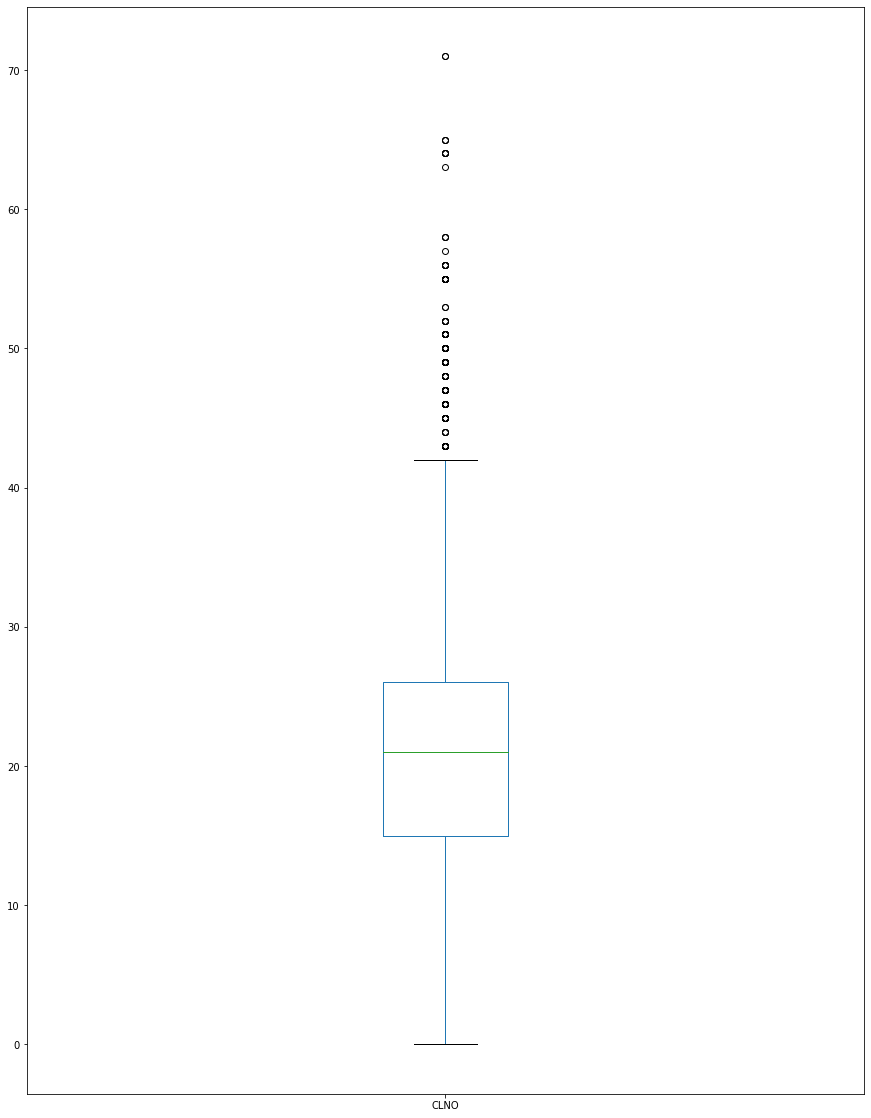

In [136]:
df['CLNO'].plot.box(subplots=True, figsize=(15,20))

In [137]:
df[df['DEROG']== 4.5]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC


In [138]:
#df[['DEROG','DELINQ','NINQ','CLNO']] = df[['DEROG','DELINQ','NINQ','CLNO']].round(0).astype(int)

In [139]:
df['CLAGE'].round(1).astype(int)

0        94
1       121
2       149
3       179
4        93
       ... 
5951    221
5952    208
5953    212
5954    213
5955    219
Name: CLAGE, Length: 5949, dtype: int32

In [140]:
#df.to_excel('test.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5949 entries, 0 to 5955
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5949 non-null   int64  
 1   LOAN     5949 non-null   int64  
 2   MORTDUE  5949 non-null   float64
 3   VALUE    5949 non-null   float64
 4   REASON   5949 non-null   object 
 5   JOB      5949 non-null   object 
 6   YOJ      5949 non-null   float64
 7   DEROG    5949 non-null   float64
 8   DELINQ   5949 non-null   float64
 9   CLAGE    5949 non-null   float64
 10  NINQ     5949 non-null   float64
 11  CLNO     5949 non-null   float64
 12  DEBTINC  5949 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 650.7+ KB


In [141]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.000000,39025.0,HomeImp,Other,10.500000,0.000000,0.000000,94.366667,1.000000,9.000000,34.818353
1,1,1300,70053.000000,68400.0,HomeImp,Other,7.000000,0.000000,2.000000,121.833333,0.000000,14.000000,34.818353
2,1,1500,13500.000000,16700.0,HomeImp,Other,4.000000,0.000000,0.000000,149.466667,1.000000,10.000000,34.818353
3,1,1500,73756.835547,89263.0,DebtCon,Other,8.918537,0.254865,0.450279,179.816244,1.186949,21.298411,34.818353
4,0,1700,97800.000000,112000.0,HomeImp,Office,3.000000,0.000000,0.000000,93.333333,0.000000,14.000000,34.818353


In [142]:
df.iloc[3,6]

8.918537258509659

In [143]:
df.iloc[3,10].round(1).astype(int)

1

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5949 entries, 0 to 5955
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5949 non-null   int64  
 1   LOAN     5949 non-null   int64  
 2   MORTDUE  5949 non-null   float64
 3   VALUE    5949 non-null   float64
 4   REASON   5949 non-null   object 
 5   JOB      5949 non-null   object 
 6   YOJ      5949 non-null   float64
 7   DEROG    5949 non-null   float64
 8   DELINQ   5949 non-null   float64
 9   CLAGE    5949 non-null   float64
 10  NINQ     5949 non-null   float64
 11  CLNO     5949 non-null   float64
 12  DEBTINC  5949 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 810.7+ KB


In [145]:
df['JOB'].value_counts()

Other      2660
ProfExe    1275
Office      946
Mgr         766
Self        193
Sales       109
Name: JOB, dtype: int64

In [146]:
# a = 5
# b = 8

In [147]:
a+b

NameError: name 'a' is not defined